**Importing Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\4.linearsep.csv",header=None)

In [3]:
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [6]:
df[2].value_counts(normalize = True)

1.0    0.5
0.0    0.5
Name: 2, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

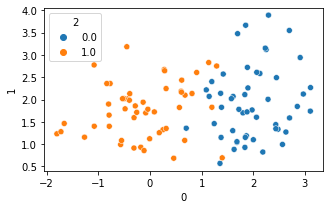

In [7]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = df[0], y = df[1], hue = df[2])

**Splitting train and test data**

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.9)

In [10]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(90, 2) (90,)
(10, 2) (10,)


**Standardizing the train data**

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [12]:
std_train=std.fit_transform(x_train)

In [13]:
std_train

array([[ 0.37919019,  0.37593126],
       [-0.34177433, -1.71663368],
       [-0.50769653, -0.79913631],
       [ 0.62966518, -1.20326738],
       [-1.05311904,  0.1969485 ],
       [ 0.56517931, -0.82847279],
       [-1.31899996,  0.69150712],
       [-1.08912684, -0.12464315],
       [-0.48752001,  1.14265247],
       [ 0.01104104,  1.04754731],
       [-2.07455633, -0.86120224],
       [ 0.75114327,  0.33477127],
       [ 1.26086652, -0.78197279],
       [ 0.41900484,  0.99682252],
       [-0.06073827,  0.36992716],
       [ 0.92979565, -0.39479618],
       [-1.56524758,  1.28941649],
       [ 1.60141133,  1.52879281],
       [ 0.54409354,  0.20375029],
       [-2.02480812, -0.59660419],
       [ 0.98281574,  1.01563466],
       [-1.71263442, -1.03804262],
       [-0.21923893,  0.80038174],
       [ 0.72157274, -0.25559907],
       [ 0.38572701, -1.04696336],
       [ 0.75797599, -1.04555609],
       [-0.71166203, -1.08932593],
       [ 0.28015994, -0.60104408],
       [-1.33218886,

**Creating Dense layers**

In [14]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(15, activation = 'tanh', input_dim = 2))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(5, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                45        
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [18]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

**Fitting**

In [19]:
save=model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 33ms/step - loss: 0.7038 - accuracy: 0.5139 - val_loss: 0.6855 - val_accuracy: 0.4444
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6400 - accuracy: 0.5139 - val_loss: 0.6079 - val_accuracy: 0.5556
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5880 - accuracy: 0.7639 - val_loss: 0.5407 - val_accuracy: 1.0000
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5405 - accuracy: 0.9167 - val_loss: 0.4840 - val_accuracy: 1.0000
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5024 - accuracy: 0.9028 - val_loss: 0.4371 - val_accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4681 - accuracy: 0.9028 - val_loss: 0.3953 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4356 - accuracy: 0.9306 - val_loss: 0.3583 - val_accuracy: 1.0000
Epoch 8/100
8/8 [=========

In [20]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

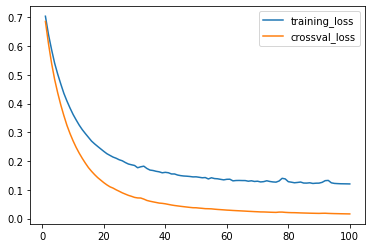

In [24]:
plt.plot(range(1, 101),tl,label="training_loss")
plt.plot(range(1, 101),cvl,label="crossval_loss")
plt.legend()

In [26]:
pred_train = model.predict(x_train)

3/3 [==============================] - 0s 2ms/step


In [27]:
pred_train

array([[0.07918359],
       [0.753133  ],
       [0.9755433 ],
       [0.01608267],
       [0.98764133],
       [0.01873696],
       [0.9881239 ],
       [0.9876616 ],
       [0.9843209 ],
       [0.9089412 ],
       [0.98851   ],
       [0.02002202],
       [0.01317018],
       [0.12546974],
       [0.89033264],
       [0.01483769],
       [0.98832166],
       [0.01361727],
       [0.03057666],
       [0.9885025 ],
       [0.01762834],
       [0.98834884],
       [0.96989834],
       [0.01781297],
       [0.024021  ],
       [0.01509521],
       [0.9829526 ],
       [0.04943495],
       [0.9880209 ],
       [0.98780864],
       [0.01598958],
       [0.9875829 ],
       [0.01416045],
       [0.27050367],
       [0.01324971],
       [0.02535764],
       [0.9885248 ],
       [0.98827136],
       [0.47446758],
       [0.04604253],
       [0.01446446],
       [0.11830519],
       [0.72404593],
       [0.1177755 ],
       [0.35718173],
       [0.9880731 ],
       [0.0150475 ],
       [0.012

In [28]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [29]:
train_pred.shape

(90, 1)

In [30]:
y_pred = train_pred.flatten()

In [35]:
y_pred.shape

(90,)

<AxesSubplot:xlabel='0', ylabel='1'>

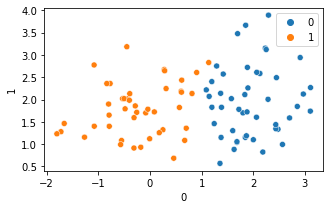

In [31]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_pred)

<AxesSubplot:xlabel='0', ylabel='1'>

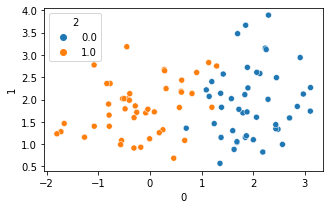

In [32]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [33]:
from mlxtend.plotting import plot_decision_regions

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

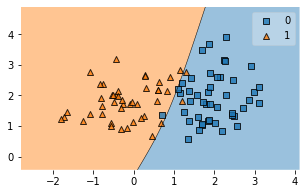

In [34]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

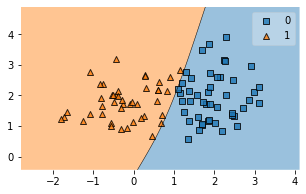

In [36]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_pred.astype(int),clf=model)

In [37]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)

0.9666666666666667